## Processing and Data Analysis on FlightDelays dataset

### Data cleaning

Import libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

Read csv file

In [2]:
df = pd.read_csv('DelayedFlights.csv')

View DataFrame

In [3]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


View the dataframe index and columns

In [4]:
df.index

RangeIndex(start=0, stop=1936758, step=1)

In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Dataset contains 30 variables and around 2 million records. For our analysis we will eliminate some of the columns that represent derivable or not important information.Remember that all data for year 2008.

In [6]:
df1=df.drop(df.columns[[0,1,5,7,8,10,12,13,14,15,18,20,21,22,23,24,25,26,27,28,29]], axis=1)
df1

,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,TailNum,DepDelay,Origin,Distance
0,1,3,4,1955,WN,N712SW,8.0,IAD,810
1,1,3,4,735,WN,N772SW,19.0,IAD,810
2,1,3,4,620,WN,N428WN,8.0,IND,515
3,1,3,4,1755,WN,N464WN,34.0,IND,515
4,1,3,4,1915,WN,N726SW,25.0,IND,688
5,1,3,4,1830,WN,N763SW,67.0,IND,1591
6,1,3,4,700,WN,N690SW,6.0,IND,828
7,1,3,4,1510,WN,N334SW,94.0,IND,828
8,1,3,4,1020,WN,N263WN,9.0,IND,162
9,1,3,4,1425,WN,N286WN,27.0,IND,1489


To see records with null values

In [7]:
null_data = df1[df1.isnull().any(axis=1)]
null_data

,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,TailNum,DepDelay,Origin,Distance
433449,3,21,5,1320,OH,NaN,13.0,CVG,268
523748,3,18,2,1655,9E,NaN,21.0,DSM,534
773772,5,8,4,1530,OH,NaN,15.0,CVG,497
776480,5,31,6,1244,OH,NaN,276.0,RDU,426
1309410,8,2,6,1305,OH,NaN,335.0,RDU,356


Drop rows with missing values.

In [8]:
df1=df1.dropna()

Save clean dataset in csv file

In [9]:
df1.to_csv('FlightsClean.csv')

Open clean dataset for further analysis

In [10]:
df2 = pd.read_csv('FlightsClean.csv')

In [11]:
df2

,Unnamed: 0,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,TailNum,DepDelay,Origin,Distance
0,0,1,3,4,1955,WN,N712SW,8.0,IAD,810
1,1,1,3,4,735,WN,N772SW,19.0,IAD,810
2,2,1,3,4,620,WN,N428WN,8.0,IND,515
3,3,1,3,4,1755,WN,N464WN,34.0,IND,515
4,4,1,3,4,1915,WN,N726SW,25.0,IND,688
5,5,1,3,4,1830,WN,N763SW,67.0,IND,1591
6,6,1,3,4,700,WN,N690SW,6.0,IND,828
7,7,1,3,4,1510,WN,N334SW,94.0,IND,828
8,8,1,3,4,1020,WN,N263WN,9.0,IND,162
9,9,1,3,4,1425,WN,N286WN,27.0,IND,1489


### Data processing and analysis

In [12]:
df2.columns

Index(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'UniqueCarrier', 'TailNum', 'DepDelay', 'Origin', 'Distance'],
      dtype='object')

Rename columns for clarity

In [13]:
df2.rename(columns={'CRSDepTime':'SchedDepTime', 'UniqueCarrier':'Carrier'}, inplace=True)
df2.columns

Index(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'SchedDepTime',
       'Carrier', 'TailNum', 'DepDelay', 'Origin', 'Distance'],
      dtype='object')

Show average delay per month

In [14]:
MonthDelay=df2.groupby("Month")["DepDelay"].mean().reset_index(name ="DepDelay")
MonthDelay

,Month,DepDelay
0,1,43.545680
1,2,44.988440
2,3,42.885481
3,4,39.864115
4,5,39.040184
5,6,45.825926
6,7,46.659887
7,8,43.726180
8,9,38.236322
9,10,34.868737


To show top 3 months based on average departure delay time

In [15]:
print(MonthDelay.nlargest(3,"DepDelay"))

    Month   DepDelay
11     12  49.145089
6       7  46.659887
5       6  45.825926


Aggregate dparture and arrival delay time by day of week and sort in descending way

In [16]:
DayOfWeekDelay=df2.groupby("DayOfWeek")["DepDelay"].mean().reset_index(name ="DepDelay")
DayOfWeekDelay.sort_values(["DepDelay"], ascending=False)

,DayOfWeek,DepDelay
6,7,45.859422
1,2,44.075691
4,5,44.017039
0,1,43.227633
3,4,41.676683
5,6,41.477698
2,3,41.429611


To see carriers presented in database

In [17]:
print(df2["Carrier"].unique())

['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']


In [18]:
print(df2["Origin"].unique())

['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' 'MDT' 'MFR' 'OGG' 'PSP' 'RAP' 'ROA' 'SBA' 'SBN' 'SPI' 'TEX' 'YUM'
 'AVP' 'CWA' 'DRO' 'ILM' 'ITO' 'JFK' 'TVC' 'HDN' 'S

In [19]:
origin=df2.groupby("Origin")["DepDelay"].mean().reset_index(name ="DepDelay")
origin.sort_values(["DepDelay"])

,Origin,DepDelay
288,TUP,11.000000
301,YKM,22.472727
141,INL,23.000000
122,GST,25.075000
298,WYS,25.100000
232,PUB,27.000000
142,IPL,28.517007
214,OXR,29.268966
60,CLD,29.721271
8,ADK,30.509434


In [20]:
df2.groupby(["Origin","Carrier"])["DepDelay"].mean()

Origin  Carrier
ABE     9E         58.967105
        EV         48.027451
        OH         70.388889
        OO         61.767857
        US         66.846154
        XE         44.029412
        YV         71.680000
ABI     MQ         66.469388
ABQ     AA         49.437768
        CO         52.722973
        DL         40.748971
        F9         32.070652
        MQ         60.921053
        NW         54.578431
        OO         40.653701
        UA         43.544554
        US         36.510204
        WN         32.863867
        XE         41.350276
        YV         38.083333
ABY     EV         49.448630
ACK     B6         90.651163
        OH         67.500000
        XE         56.720721
ACT     MQ         44.222857
ACV     OO         58.761023
ACY     EV         79.642857
        OH         70.000000
ADK     AS         30.509434
ADQ     AS         33.823529
                     ...    
TYR     MQ         57.238494
TYS     9E         60.451670
        DL         53.15384

Group time of departure into 1 hour time interval

In [21]:
df2['SchedDepTime']=df2['SchedDepTime']/100
df2.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,1,3,4,19.55,WN,N712SW,8.0,IAD,810
1,1,1,3,4,7.35,WN,N772SW,19.0,IAD,810
2,2,1,3,4,6.20,WN,N428WN,8.0,IND,515
3,3,1,3,4,17.55,WN,N464WN,34.0,IND,515
4,4,1,3,4,19.15,WN,N726SW,25.0,IND,688


In [22]:
df2['SchedDepTime'].describe()

count    1.936753e+06
mean     1.467473e+01
std      4.247673e+00
min      0.000000e+00
25%      1.135000e+01
50%      1.510000e+01
75%      1.815000e+01
max      2.359000e+01
Name: SchedDepTime, dtype: float64

In [23]:
for i in range(25):
    df2.loc[(df2['SchedDepTime'] <= i) & (df2['SchedDepTime'] > i-1), 'SchedDepTime'] = i
    
df2

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,1,3,4,20.0,WN,N712SW,8.0,IAD,810
1,1,1,3,4,8.0,WN,N772SW,19.0,IAD,810
2,2,1,3,4,7.0,WN,N428WN,8.0,IND,515
3,3,1,3,4,18.0,WN,N464WN,34.0,IND,515
4,4,1,3,4,20.0,WN,N726SW,25.0,IND,688
5,5,1,3,4,19.0,WN,N763SW,67.0,IND,1591
6,6,1,3,4,7.0,WN,N690SW,6.0,IND,828
7,7,1,3,4,16.0,WN,N334SW,94.0,IND,828
8,8,1,3,4,11.0,WN,N263WN,9.0,IND,162
9,9,1,3,4,15.0,WN,N286WN,27.0,IND,1489


Group distance of flight into equal bins of 500 miles each

In [24]:
df2['Distance'].describe()

count    1.936753e+06
mean     7.656871e+02
std      5.744801e+02
min      1.100000e+01
25%      3.380000e+02
50%      6.060000e+02
75%      9.980000e+02
max      4.962000e+03
Name: Distance, dtype: float64

In [25]:
for i in range(11):
    df2.loc[(df2['Distance'] <= i*500) & (df2['Distance'] > (i-1)*500), 'Distance'] = i
    
df2

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,1,3,4,20.0,WN,N712SW,8.0,IAD,2
1,1,1,3,4,8.0,WN,N772SW,19.0,IAD,2
2,2,1,3,4,7.0,WN,N428WN,8.0,IND,2
3,3,1,3,4,18.0,WN,N464WN,34.0,IND,2
4,4,1,3,4,20.0,WN,N726SW,25.0,IND,2
5,5,1,3,4,19.0,WN,N763SW,67.0,IND,4
6,6,1,3,4,7.0,WN,N690SW,6.0,IND,2
7,7,1,3,4,16.0,WN,N334SW,94.0,IND,2
8,8,1,3,4,11.0,WN,N263WN,9.0,IND,1
9,9,1,3,4,15.0,WN,N286WN,27.0,IND,3


In [26]:
df2.groupby(["Distance"])["Distance"].count()

Distance
1     779424
2     675334
3     259740
4     126352
5      68515
6      23865
7       1009
8       1300
9        424
10       790
Name: Distance, dtype: int64

Check if there is correlation between day of week, departure time, carrier and distance

In [27]:
df2.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,1,3,4,20.0,WN,N712SW,8.0,IAD,2
1,1,1,3,4,8.0,WN,N772SW,19.0,IAD,2
2,2,1,3,4,7.0,WN,N428WN,8.0,IND,2
3,3,1,3,4,18.0,WN,N464WN,34.0,IND,2
4,4,1,3,4,20.0,WN,N726SW,25.0,IND,2


In [28]:
df2.groupby(["Carrier","DayOfWeek", "SchedDepTime", "Distance"])["DepDelay"].mean()

Carrier  DayOfWeek  SchedDepTime  Distance
9E       1          5.0           1           59.444444
                    6.0           1           41.764706
                                  2           45.754386
                                  3           52.333333
                    7.0           1           54.165323
                                  2           42.710843
                                  3           55.000000
                    8.0           1           65.927536
                                  2           36.995349
                                  3           28.666667
                    9.0           1           44.317881
                                  2           40.301255
                    10.0          1           42.683891
                                  2           45.330275
                                  3           99.000000
                    11.0          1           39.197531
                                  2           45.696581
     

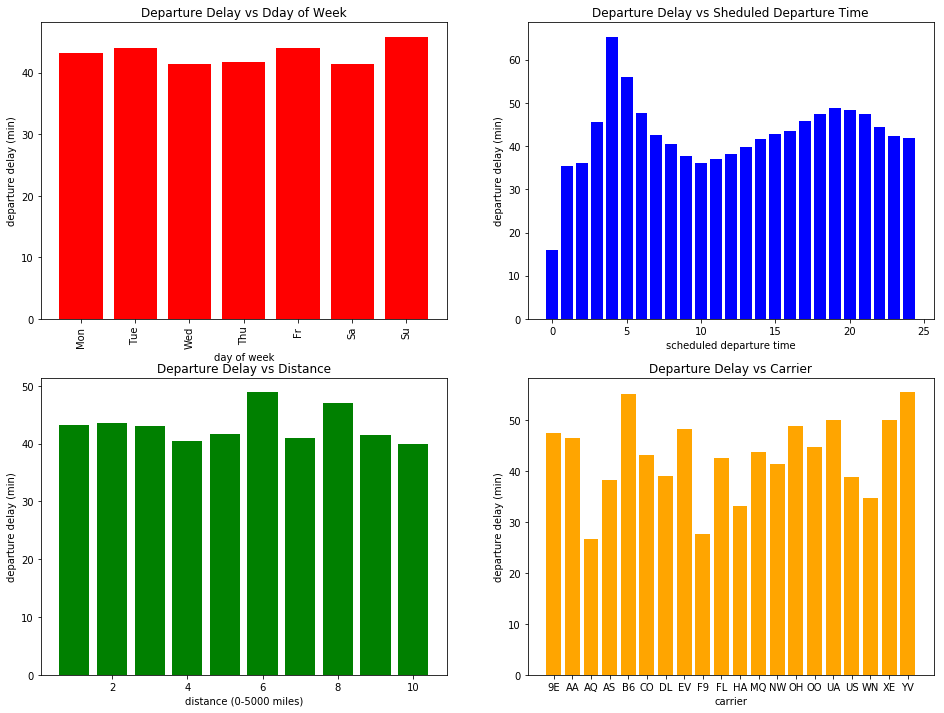

In [29]:
a=df2.groupby(["DayOfWeek"])["DepDelay"].mean().reset_index(name="DepDelay")
b=df2.groupby(["SchedDepTime"])["DepDelay"].mean().reset_index(name="DepDelay")
c=df2.groupby(["Distance"])["DepDelay"].mean().reset_index(name="DepDelay")
d=df2.groupby(["Carrier"])["DepDelay"].mean().reset_index(name="DepDelay")
# print(a)
# print(b)
# print(c)
# print(d.sort_values(["DepDelay"], ascending=False))


plt.figure(figsize=(16, 12))
plt.subplot(221)

ax1=plt.bar(a["DayOfWeek"], a["DepDelay"], align='center', color="red")
plt.xlabel("day of week")
plt.ylabel("departure delay (min)")
plt.xticks([1,2,3,4,5,6,7],
          ['Mon','Tue','Wed','Thu', 'Fr', 'Sa','Su'], rotation="vertical")
plt.title("Departure Delay vs Dday of Week")

plt.subplot(222)
ax2=plt.bar(b["SchedDepTime"], b["DepDelay"], align='center', color="blue")
plt.xlabel("scheduled departure time")
plt.ylabel("departure delay (min)")
plt.title("Departure Delay vs Sheduled Departure Time")

plt.subplot(223)
ax3=plt.bar(c["Distance"], c["DepDelay"], align='center', color="green")
plt.xlabel("distance (0-5000 miles)")
plt.ylabel("departure delay (min)")
plt.title("Departure Delay vs Distance")

plt.subplot(224)
ax4=plt.bar(d["Carrier"], d["DepDelay"], align='center', color="orange")
plt.xlabel("carrier")
plt.ylabel("departure delay (min)")
plt.title("Departure Delay vs Carrier")
plt.show()

In [30]:
e=df2.groupby(["TailNum"])["DepDelay"].mean()
e


TailNum
80009E    45.322997
80019E    40.997151
80059E    45.407792
80129E    45.434466
80139E    43.048000
80199E    48.885794
80209E    50.214477
80219E    44.738272
80239E    45.131579
80249E    46.583333
80259E    51.338710
80269E    52.019753
80279E    50.391549
80299E    42.091445
80309E    45.280702
80319E    50.591398
80329E    48.413793
80339E    55.993377
80349E    43.679167
80359E    49.642857
80369E    56.086066
80399E    52.243169
80409E    41.947368
80419E    51.343511
83909E    50.962406
84099E    51.548077
84129E    45.524876
84169E    54.521197
84239E    51.641944
84329E    42.987624
            ...    
N988DL    40.303103
N988HA    51.367089
N989AT    51.571936
N989CA    49.191977
N989DL    42.264706
N989HA    54.296552
N990AT    39.069725
N990DL    46.644385
N991AT    40.655955
N991DL    37.917706
N991HA    47.976744
N991cA    42.286885
N992AT    46.951872
N992DL    48.393868
N993AT    43.911917
N993DL    39.918079
N994AT    45.151093
N994DL    45.716113
N995AT    47

<font color=blue>***Current project will be focused on business use case concerning passangers search of flights covering some specific criteria. Result of data analysis supposably will lead to an application that will predict delay time based on carrier, distance of flight, time of departure, airport of origin, tail number and day of week. Modeling will be based on regression analysis of these variables.***</font>

In [31]:
#saving processed data
df2.to_csv('FlightsProcessed.csv')

Making illustrative plots for business perspective report

In [32]:
df = pd.read_csv('FlightsProcessed.csv')

In [33]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,0,1,3,4,20.0,WN,N712SW,8.0,IAD,2
1,1,1,1,3,4,8.0,WN,N772SW,19.0,IAD,2
2,2,2,1,3,4,7.0,WN,N428WN,8.0,IND,2
3,3,3,1,3,4,18.0,WN,N464WN,34.0,IND,2
4,4,4,1,3,4,20.0,WN,N726SW,25.0,IND,2


In [34]:
x=[]
y=[]
carrier=df.groupby("Carrier")["DepDelay"].mean().reset_index(name ="DepDelay")
carrier=carrier.sort_values(["DepDelay"])
carrier = carrier.reset_index(drop=True)
x=carrier["Carrier"]
y=carrier["DepDelay"]

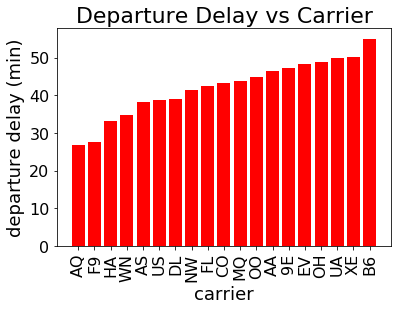

In [35]:
index=[]
xx=[]
yy=[]
for i in range(19):
    index.append(i+1)
    xx.append(x[i])
    yy.append(y[i])
plt.bar(index, yy, align='center', color="red")
plt.xticks(index, xx,size=16, rotation="vertical")  # set the X ticks and labels
plt.yticks(size=16)
plt.xlabel("carrier",size=18)
plt.ylabel("departure delay (min)",size=18)
plt.title("Departure Delay vs Carrier",size=22)
plt.show()

In [36]:
X=[]
Y=[]
origin=df.groupby("Origin")["DepDelay"].mean().reset_index(name ="DepDelay")
origin=origin.sort_values(["DepDelay"]).nsmallest(20,"DepDelay")
origin = origin.reset_index(drop=True)
X=origin["Origin"]
Y=origin["DepDelay"]

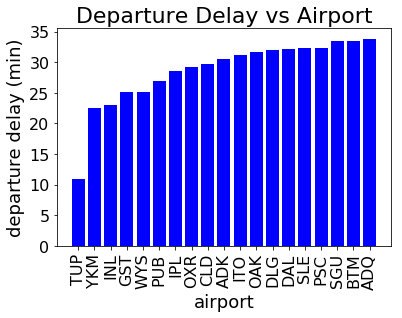

In [37]:
INDEX=[]
XX=[]
YY=[]
for i in range(19):
    INDEX.append(i+1)
    XX.append(X[i])
    YY.append(Y[i])
plt.bar(index, YY, align='center', color="blue")
plt.xticks(index, XX, rotation="vertical", size=16)  # set the X ticks and labels
plt.yticks(size=16)
plt.xlabel("airport", size=18)
plt.ylabel("departure delay (min)", size=18)
plt.title("Departure Delay vs Airport",size=22)
plt.show()